# Dependence of coil diameter on length

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
wire_diameter = 0.22
coil_height = 50
coil_levels = 100
inner_coil_diameter = 60
turns = round(coil_height / wire_diameter)

In [12]:
outer_coil_diameter = inner_coil_diameter + coil_levels * wire_diameter * 2
print("Outer Coil Diameter:", outer_coil_diameter)

Outer Coil Diameter: 104.0


Let's calculate the length for 100 layers.

In [15]:
wire_length = 0
for level in range(coil_levels + 1):
    coil_diameter = inner_coil_diameter + wire_diameter / 2 + wire_diameter * level
    wire_length += coil_diameter * np.pi * turns

print("Wire Length:", round(wire_length / 1000), "m")

Wire Length: 5122 m


Now let's check ourselves

In [26]:
def get_coil_levels(wire_length, inner_coil_diameter, wire_diameter, coil_height):
    turns = round(coil_height / wire_diameter)
    need_coil_levels = -1
    remainder_length = wire_length

    while remainder_length > 0:
        coil_diameter = inner_coil_diameter + wire_diameter / 2 + wire_diameter * (need_coil_levels + 1)
        turn_length = coil_diameter * np.pi
        for turn in range(turns, -1, -1):
            if remainder_length <= 0:
                break
            remainder_length -= turn_length
        need_coil_levels += 1

    return need_coil_levels

print("Winding levels:", get_coil_levels(wire_length, inner_coil_diameter, wire_diameter, coil_height))

Winding levels: 100


Let's calculate the diameter of the coil relative to the length of the coil for different wire lengths.

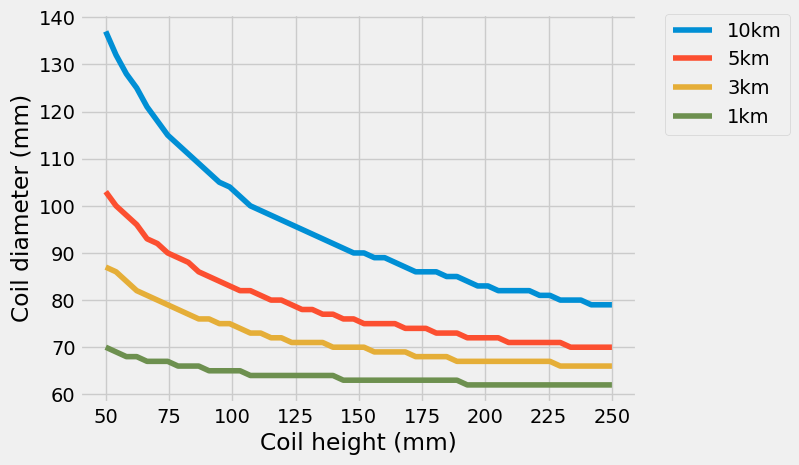

In [39]:
def get_coil_diameter(wire_length, inner_coil_diameter, wire_diameter, height_of_coil):
    outer_coil_diameters = []
    for coil_height in height_of_coil:
        coil_levels = get_coil_levels(wire_length, inner_coil_diameter, wire_diameter, coil_height)
        outer_coil_diameters.append(round(inner_coil_diameter + 2 * coil_levels * wire_diameter))
    return outer_coil_diameters

height_of_coil = np.linspace(50, 250)

fig, ax = plt.subplots()
ax.plot(height_of_coil, get_coil_diameter(10000000, inner_coil_diameter, wire_diameter, height_of_coil), label='10km')
ax.plot(height_of_coil, get_coil_diameter(5000000, inner_coil_diameter, wire_diameter, height_of_coil), label='5km')
ax.plot(height_of_coil, get_coil_diameter(3000000, inner_coil_diameter, wire_diameter, height_of_coil), label='3km')
ax.plot(height_of_coil, get_coil_diameter(1000000, inner_coil_diameter, wire_diameter, height_of_coil), label='1km')
ax.set_xlabel('Coil height (mm)')
ax.set_ylabel('Coil diameter (mm)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()